In [1]:
import xarray as xr
import fsspec
import os
import rioxarray
import rasterio

In [2]:
path = (
    "s3://eodata/Sentinel-3/SYNERGY/SY_2_SYN___/2025/07/06/S3B_SY_2_SYN"
    "____20250706T233058_20250706T233358_20250708T043306_0179_108_258_"
    "3420_ESA_O_NT_002.SEN3/Syn_Oa01_reflectance.nc"
)

In [3]:
session = rasterio.session.AWSSession(
    aws_unsigned=False,
    endpoint_url="eodata.dataspace.copernicus.eu",
    aws_access_key_id="O0M0CUQIDQO9TDZ4D8NR",
    aws_secret_access_key="qPUyXs9G6j8on6MY5KPhQNHuA5uZTqxEscrbBCGx",
)
env = rasterio.env.Env(session=session, AWS_VIRTUAL_HOSTING=False)
# keep the rasterio environment open so that the data can be accessed
# when plotting or writing the data
env = env.__enter__()

In [4]:
%%time
ds = rioxarray.open_rasterio(
    path,
    chunks=dict(band=1, y=1023, x=1217),
    band_as_variable=True,
    driver="netCDF",
)
ds

/home/konstantin/micromamba/envs/xcube-stac/lib/python3.13/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/konstantin/micromamba/envs/xcube-stac/lib/python3.13/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/home/konstantin/micromamba/envs/xcube-stac/lib/python3.13/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


CPU times: user 42.7 ms, sys: 7.26 ms, total: 50 ms
Wall time: 702 ms


/home/konstantin/micromamba/envs/xcube-stac/lib/python3.13/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


<xarray.Dataset> Size: 80MB
Dimensions:       (band: 1, x: 4865, y: 4091)
Coordinates:
  * band          (band) int64 8B 1
  * x             (x) float64 39kB 0.5 1.5 2.5 ... 4.862e+03 4.864e+03 4.864e+03
  * y             (y) float64 33kB 0.5 1.5 2.5 ... 4.088e+03 4.09e+03 4.09e+03
    spatial_ref   int64 8B 0
Data variables:
    SDR_Oa01      (band, y, x) int16 40MB dask.array<chunksize=(1, 1023, 1217), meta=np.ndarray>
    SDR_Oa01_err  (band, y, x) int16 40MB dask.array<chunksize=(1, 1023, 1217), meta=np.ndarray>
Attributes: (12/15)
    absolute_orbit_number:  37490
    comment:                
    contact:                eosupport@copernicus.esa.int
    creation_time:          2025-07-08T04:33:06Z
    history:                2025-07-08T04:33:06Z: PUGCoreProcessor /data/WORK...
    institution:            ESA
    ...                     ...
    references:             S3IPF PDS 006 - i1r16 - Product Data Format Speci...
    resolution:             [ 300 300 ]
    source:                 IPF-SY-2 06.30
    start_time:             2025-07-06T23:30:58.080919Z
    stop_time:              2025-07-06T23:33:58.048821Z
    title:                  SYN L2, surface directional reflectance associate...

In [5]:
%%time
ds.SDR_Oa01[:100, :100].compute() 

CPU times: user 213 ms, sys: 114 ms, total: 327 ms
Wall time: 5.9 s


<xarray.DataArray 'SDR_Oa01' (band: 1, y: 100, x: 4865)> Size: 973kB
array([[[-10000, -10000, -10000, ..., -10000, -10000, -10000],
        [-10000, -10000, -10000, ..., -10000, -10000, -10000],
        [-10000, -10000, -10000, ..., -10000, -10000, -10000],
        ...,
        [-10000, -10000, -10000, ..., -10000, -10000, -10000],
        [-10000, -10000, -10000, ..., -10000, -10000, -10000],
        [-10000, -10000, -10000, ..., -10000, -10000, -10000]]],
      shape=(1, 100, 4865), dtype=int16)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 39kB 0.5 1.5 2.5 ... 4.862e+03 4.864e+03 4.864e+03
  * y            (y) float64 800B 0.5 1.5 2.5 3.5 4.5 ... 96.5 97.5 98.5 99.5
    spatial_ref  int64 8B 0
Attributes:
    ancillary_variables:  SDR_Oa01_err
    bandwidth:            15
    long_name:            Surface directional reflectance associated with OLC...
    scale_factor:         9.999999747378752e-05
    standard_name:        surface_directional_reflectance
    valid_max:            10000
    valid_min:            0
    wavelength:           400
    _FillValue:           -10000
    add_offset:           0.0

CPU times: user 663 ms, sys: 136 ms, total: 799 ms
Wall time: 4.99 s


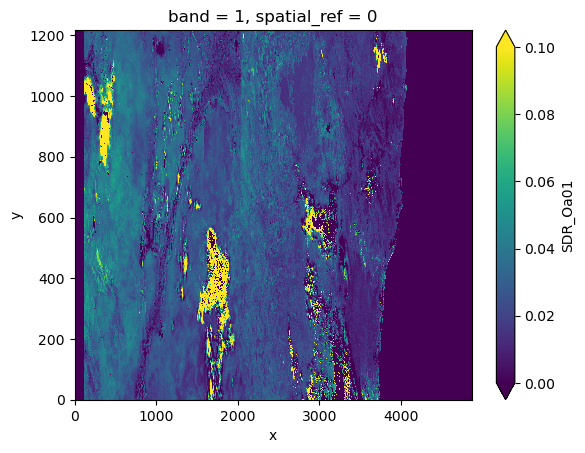

In [6]:
%%time
(ds.SDR_Oa01 * 1e-4)[:1023, :1217].plot(vmin=0., vmax=0.1)